<a href="https://colab.research.google.com/github/sergioarnold87/Practica_Sergio/blob/main/Metodos_Numericos__Ceros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import math
import cmath
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

# Ejemplo 1: cálculo de ceros usando el método de la bisección

Cálculo del cero de la función $f(x)=x^3-x+1$ por el método de la bisección con valores iniciales $x_0=-2$ y $x_1=-1$.

In [35]:
def function(x):
  return x**3-x+1

Vamos a implementar el segundo algoritmo visto en las trasparencias

In [36]:
def biseccion(x0,x1,TOL,f=function):
  """
    Dada una función f definida en el intervalo [x0,x1] tal que f(x0)*f(x1)<0, 
    devuelve un cero de la función contenido en este intervalo usando el método de la bisección.
    

    Parámetros:
    * x0: Extremo izquierdo
    * x1: Extremo derecho
    * TOL: Diferencia máxima entre dos iteraciones seguidas
    * f: función definida en los reales

    Valor de retorno 
    * cero: f(cero) es aproximadamente 0
  """
  x=(x0+x1)/2
  y=x+1
  while abs(x-y)>=TOL:
    x=(x0+x1)/2
    if (f(x0)*f(x)<0):
      x1=x
    else:
      x0=x
    y=(x0+x1)/2
  cero=x
  return cero  

In [37]:
biseccion(-2,-1,1e-16)

-1.3247179572447458

# Ejemplo 2: cálculo de ceros usando el método del punto fijo

Cálculo del cero de la función $f(x)=x^3-x+1$ usando el método del punto fijo con la función de iteración $g(x)=\sqrt[3]{x-1}$ con valor inicial $x_0=-1.5$.

In [38]:
def cube_root(x):
    return np.sign(x)*(abs(x)**(1/3.))

def function(x):
  return cube_root(x-1)


In [39]:
def puntofijo(x0,TOL,N_max,g=function):
  """
    Dada una función g definida en los reales dónde g'(x0)<1, 
    devuelve un punto fijo de la función g usando el método 
    del punto fijo.
    

    Parámetros:
    * x0: Primera iteración
    * TOL: Diferencia máxima entre dos iteraciones seguidas
    * N_max: Número máximo de iteraciones
    * g: función definida en los reales
    

    Valor de retorno 
    * pf es el punto fijo de la función g(x)
  """   
  pf=x0;
  ant=x0+1
  for i in range(N_max):  
    if abs(pf-ant)<=TOL:
      return pf
    ant=pf
    pf=g(pf)
  return pf , "Numero maximo de iteraciones superado"

In [40]:
puntofijo(-1.5,1e-8,12)

-1.3247179592198772

# Ejemplo 3: cálculo de ceros usando el método de Newton-Raphson

Cálculo del cero de la función $f(x)=\mathrm{e}^{-x}-\frac{1}{2}\ln x$ usando el método de Newton-Raphson con valor inicial $x_0=1$.

In [41]:
x00 = 2.44
V0 = 4.83*math.pi
rr = 0.03
def function(x):
  return math.pi*x00*(x**3)-3*V0*x-math.pi*(rr**3)*x00
def f_derivate(x):
  return 3*math.pi*x00*(x**2)-3*V0

In [42]:
def newtonraphson(x0,TOL,N_max,f=function,fd=f_derivate):
  """
    Dada una función f definida en los reales dónde f'(x0) és distinto de 0, 
    devuelve un cero de la función usando el método de Newton-Raphson.
    

    Parámetros:
    * x0: Primera iteración
    * TOL: Diferencia máxima entre dos iteraciones seguidas
    * N_max: Número máximo de iteraciones
    * f:funcion definida en los reales
    * fd: derivada de f
    

    Valor de retorno 
    * cero: f(cero) es aproximadamente 0
  """    
  cero=x0
  ant=x0+1
  for i in range(N_max):
    if abs(cero-ant)<TOL:
      return cero
    ant=cero
    cero=cero-f(cero)/fd(cero)
  return cero, "Numero maximo de iteraciones superado" 

In [43]:
newtonraphson(2,1e-10,100)

2.436911091887408

# Ejemplo 4: cálculo de ceros usando el método de la secante

Cálculo del cero de la función $f(x)=\mathrm{e}^{-x}-\frac{2}{x}+1$ usando el método de la secante con valores iniciales $x_0=0.5$ y $x_1=1$.

In [44]:
def function(x):
  return math.exp(-x)-(2/x)+1

In [45]:
def secante(x0,x1,TOL,N_max,f=function):
  """
    Dada una función f definida en los reales con valores iniciales x0 y x1 con f(x0) distinto de f(x1), 
    devuelve un cero de la función usando el método de la secante.
    

    Parámetros:
    * x0,x1: Primeras iteraciones
    * TOL: Diferencia máxima entre dos iteraciones seguidas
    * N_max: Número máximo de iteraciones
    * f: función definida en los reales
    

    Valor de retorno 
    * cero: f(cero) es aproximadamente 0
  """  
  y0=f(x0)  
  y1=f(x1)
  for i in range(N_max):
    x=x1-((x0-x1)/(y0-y1))*y1 
    if abs(x-x1)<TOL:
      return x
    x0=x1
    y0=y1
    x1=x
    y1=f(x)
  return x, "hemos superado el numero maximo de iteraciones"

In [46]:
secante(0.5,1,1e-10,10)

1.6878939988284736

# Ejemplo 5: cálculo de ceros usando el método de la regula-falsi

Cálculo del cero de la función $f(x)=\mathrm{e}^{-x}-\frac{2}{x}+1$ usando el método de la regula falsi con valores iniciales $x_0=1$ y $x_1=2$.

In [47]:
def function(x):
  return math.exp(-x)-(2/x)+1

In [48]:
def regulafalsi(x0,x1,TOL,N_max,f=function):
  """
    Dada una función f definida en los reales tal que f(x0)*f(x1)<0, 
    devuelve un cero de la función usando el método de la regula-falsi.
    

    Parámetros:
    * x0,x1: Primeras iteraciones    
    * TOL: Diferencia máxima entre dos iteraciones seguidas
    * N_max: Número máximo de iteraciones
    * f: función definida en los reales

    Valor de retorno 
    * x: f(x) es aproximadamente 0
  """ 
  y0 = f(x0)
  y1 = f(x1)
  for i in range(N_max):
    x=x1-((x0-x1)/(y0-y1))*y1 
    if min(abs(x-x1), abs(x-x0)) <TOL:
      return x
    y = f(x)
    if y*y1<0:
      x0=x1
      y0=y1
    x1=x
    y1=y
  return x,  "hemos superado el numero maximo de iteraciones"
 

In [49]:
regulafalsi(1,2,1e-4,15)

1.6879285829671313

# Ejemplo 6: Cálculo aproximado del orden de convergencia

## NR

Cálculo aproximado del orden de convergencia de la sucesion generada por el método de Newton-Raphson para calcular un cero de la función $f(x)=\mathrm{e}^{-x}-\frac{1}{2}\ln x$ con valor inicial $x_0=1$ (método de Newton-Raphson) .

In [50]:
def function(x):
  return math.exp(-x)-0.5*math.log(x)
def f_derivate(x):
  return -math.exp(-x)-1/(2*x)

In [53]:
 def convNR(x0, N_max, f = function, fd = f_derivate):
  """
    Dada una función f definida en los reales dónde f'(x0) és distinto de 0, 
    devuelve una recta cuya pendiente és el orden de convergencia del método de Newton-Raphson.
    

    Parámetros:
    * x0: Primera iteración
    * N_max: Número máximo de iteraciones
    * f: función definida en los reales
    * fd: función derivada de f

    Valor de retorno 
    * w: orden de convergencia del método y pendiente de la recta de regresión
    * b: término independiente de la recta de regresión
    * gráfica de la recta
  """  
  cero=[x0]
  for i in range(1,N_max):
    cero.append(cero[i-1]-f(cero[i-1])/fd(cero[i-1]))
  diferencias=[]
  for i in range(len(cero)-1):
    if (cero[len(cero)-1]-cero[i+1] != 0):
      diferencias.append(math.log(abs(cero[len(cero)-1]-cero[i])))
    else:
      break  
  v1=[]
  v2=[]
  for i in range(len(diferencias)-1):
    v1.append(diferencias[i])
    v2.append(diferencias[i+1])
  v1=np.array(v1)
  v2=np.array(v2)    
  regresion_lineal = LinearRegression() 
  regresion_lineal.fit(v1.reshape(-1,1), v2) 
  return 'w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_),plt.plot(v1,v2)

('w = [1.99891669], b = -0.9349887473608351',
 [<matplotlib.lines.Line2D at 0x7fc38865e6d0>])

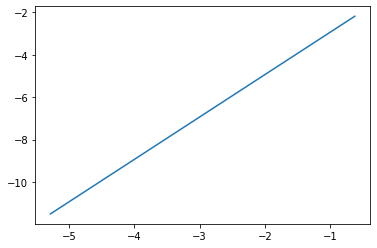

In [54]:
convNR(1,100)

## SEC
Cálculo aproximado del orden de convergencia de la sucesion generada por el método de la secante para calcular un cero de la función $f(x)=\mathrm{e}^{-x}-\frac{1}{2}\ln x$ con valores iniciales $x_0=0.5$ y $x_1=1$ (método de Newton-Raphson).

In [55]:

def convSec(x0,x1,N_max,f=function):
  """
    Dada una función f definida en los reales dónde f(x0) és distinto de f(x1),
     devuelve una recta cuya pendiente és el orden de convergencia del método de la secante.
    

    Parámetros:
    * x0: Primera iteración
    * x1: segunda iteración
    * N_max: Número máximo de iteraciones
    * f: función definida en los reales

    Valor de retorno 
    * w: orden de convergencia del método y pendiente de la recta de regresión
    * b: término independiente de la recta de regresión
    * gráfica de la recta
  """  
  y1=x1
  cero=[x0,x1]
  for i in range(2,N_max):
    if abs(f(x0)-f(x1))==0:
      break
    x1=x0-((x0-x1)/(f(x0)-f(x1)))*f(x0)  
    cero.append(x1)
    x0=y1
    y1=x1
  diferencias=[]
  for i in range(len(cero)-1):
    if (cero[len(cero)-1]-cero[i+1] != 0):
      diferencias.append(math.log(abs(cero[len(cero)-1]-cero[i])))
    else:
      break  
  v1=[]
  v2=[]
  for i in range(len(diferencias)-1):
    v1.append(diferencias[i])
    v2.append(diferencias[i+1])
  v1=np.array(v1)
  v2=np.array(v2)  
  regresion_lineal = LinearRegression() 
  regresion_lineal.fit(v1.reshape(-1,1), v2) 
  return 'w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_), plt.plot(v1,v2)
   

('w = [1.6138762], b = -0.5981116755691067',
 [<matplotlib.lines.Line2D at 0x7fc383c09090>])

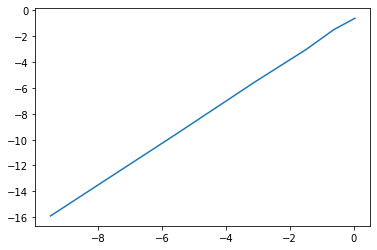

In [56]:
convSec(0.5,1,100)

# Ejemplo 7: Cálculo de raíces múltiples

Cálculo de la sucesión generada por el método de Newton-Raphson al intentar calcular el cero doble $\hat{x}=0$ de la función $f(x)=1-\cos x$ con valor inicial $x_0=1$.

In [57]:
def function(x):
  return 1-math.cos(x)
def f_der(x):
  return math.sin(x)

In [58]:
def sucNR(x0,N_max,f=function,fd=f_der):
  """
    Dada una función f definida en los reales dónde f'(x0) és distinto de 0, 
    devuelve la sucesión generada por el método de Newton-Raphson.
    

    Parámetros:
    * x0: Primera iteración
    * N_max: Número máximo de iteraciones
    * f: función definida en los reales
    * fd: función derivada de f

    Valor de retorno 
    * cero: sucesión generada por el método de Newton-Raphson
    * fcero: sucesión generada por el método de Newton-Raphson evaluada en f
    * diferencias: diferencia entre dos términos seguidos de cada iteración
  """
  cero=[x0]
  for i in range(1,N_max):
    if(cero[i-1]==0):
      break
    cero.append(cero[i-1]-f(cero[i-1])/fd(cero[i-1]))
  diferencias=[]
  for i in range(len(cero)-1):
    if (cero[len(cero)-1]-cero[i+1] != 0):
      diferencias.append(abs(cero[i+1]-cero[i]))
    else:
      diferencias.append(0)
  diferencias.append(0)    
  fcero=[]
  for i in cero:
    fcero.append(f(i))    
  res=pd.DataFrame(cero,columns=['cero'])
  res['f(cero)']=fcero
  res['xi-xi+1']=diferencias

  return res 



In [59]:
sucNR(1,10)

,cero,f(cero),xi-xi+1
0,1.000000,0.459698,0.546302
1,0.453698,0.101167,0.230822
2,0.222876,0.024734,0.111901
3,0.110974,0.006151,0.055544
4,0.055430,0.001536,0.027722
5,0.027708,0.000384,0.013855
6,0.013853,0.000096,0.006927
7,0.006926,0.000024,0.003463
8,0.003463,0.000006,0.000000
9,0.001732,0.000001,0.000000
